#**GDG TASK 4**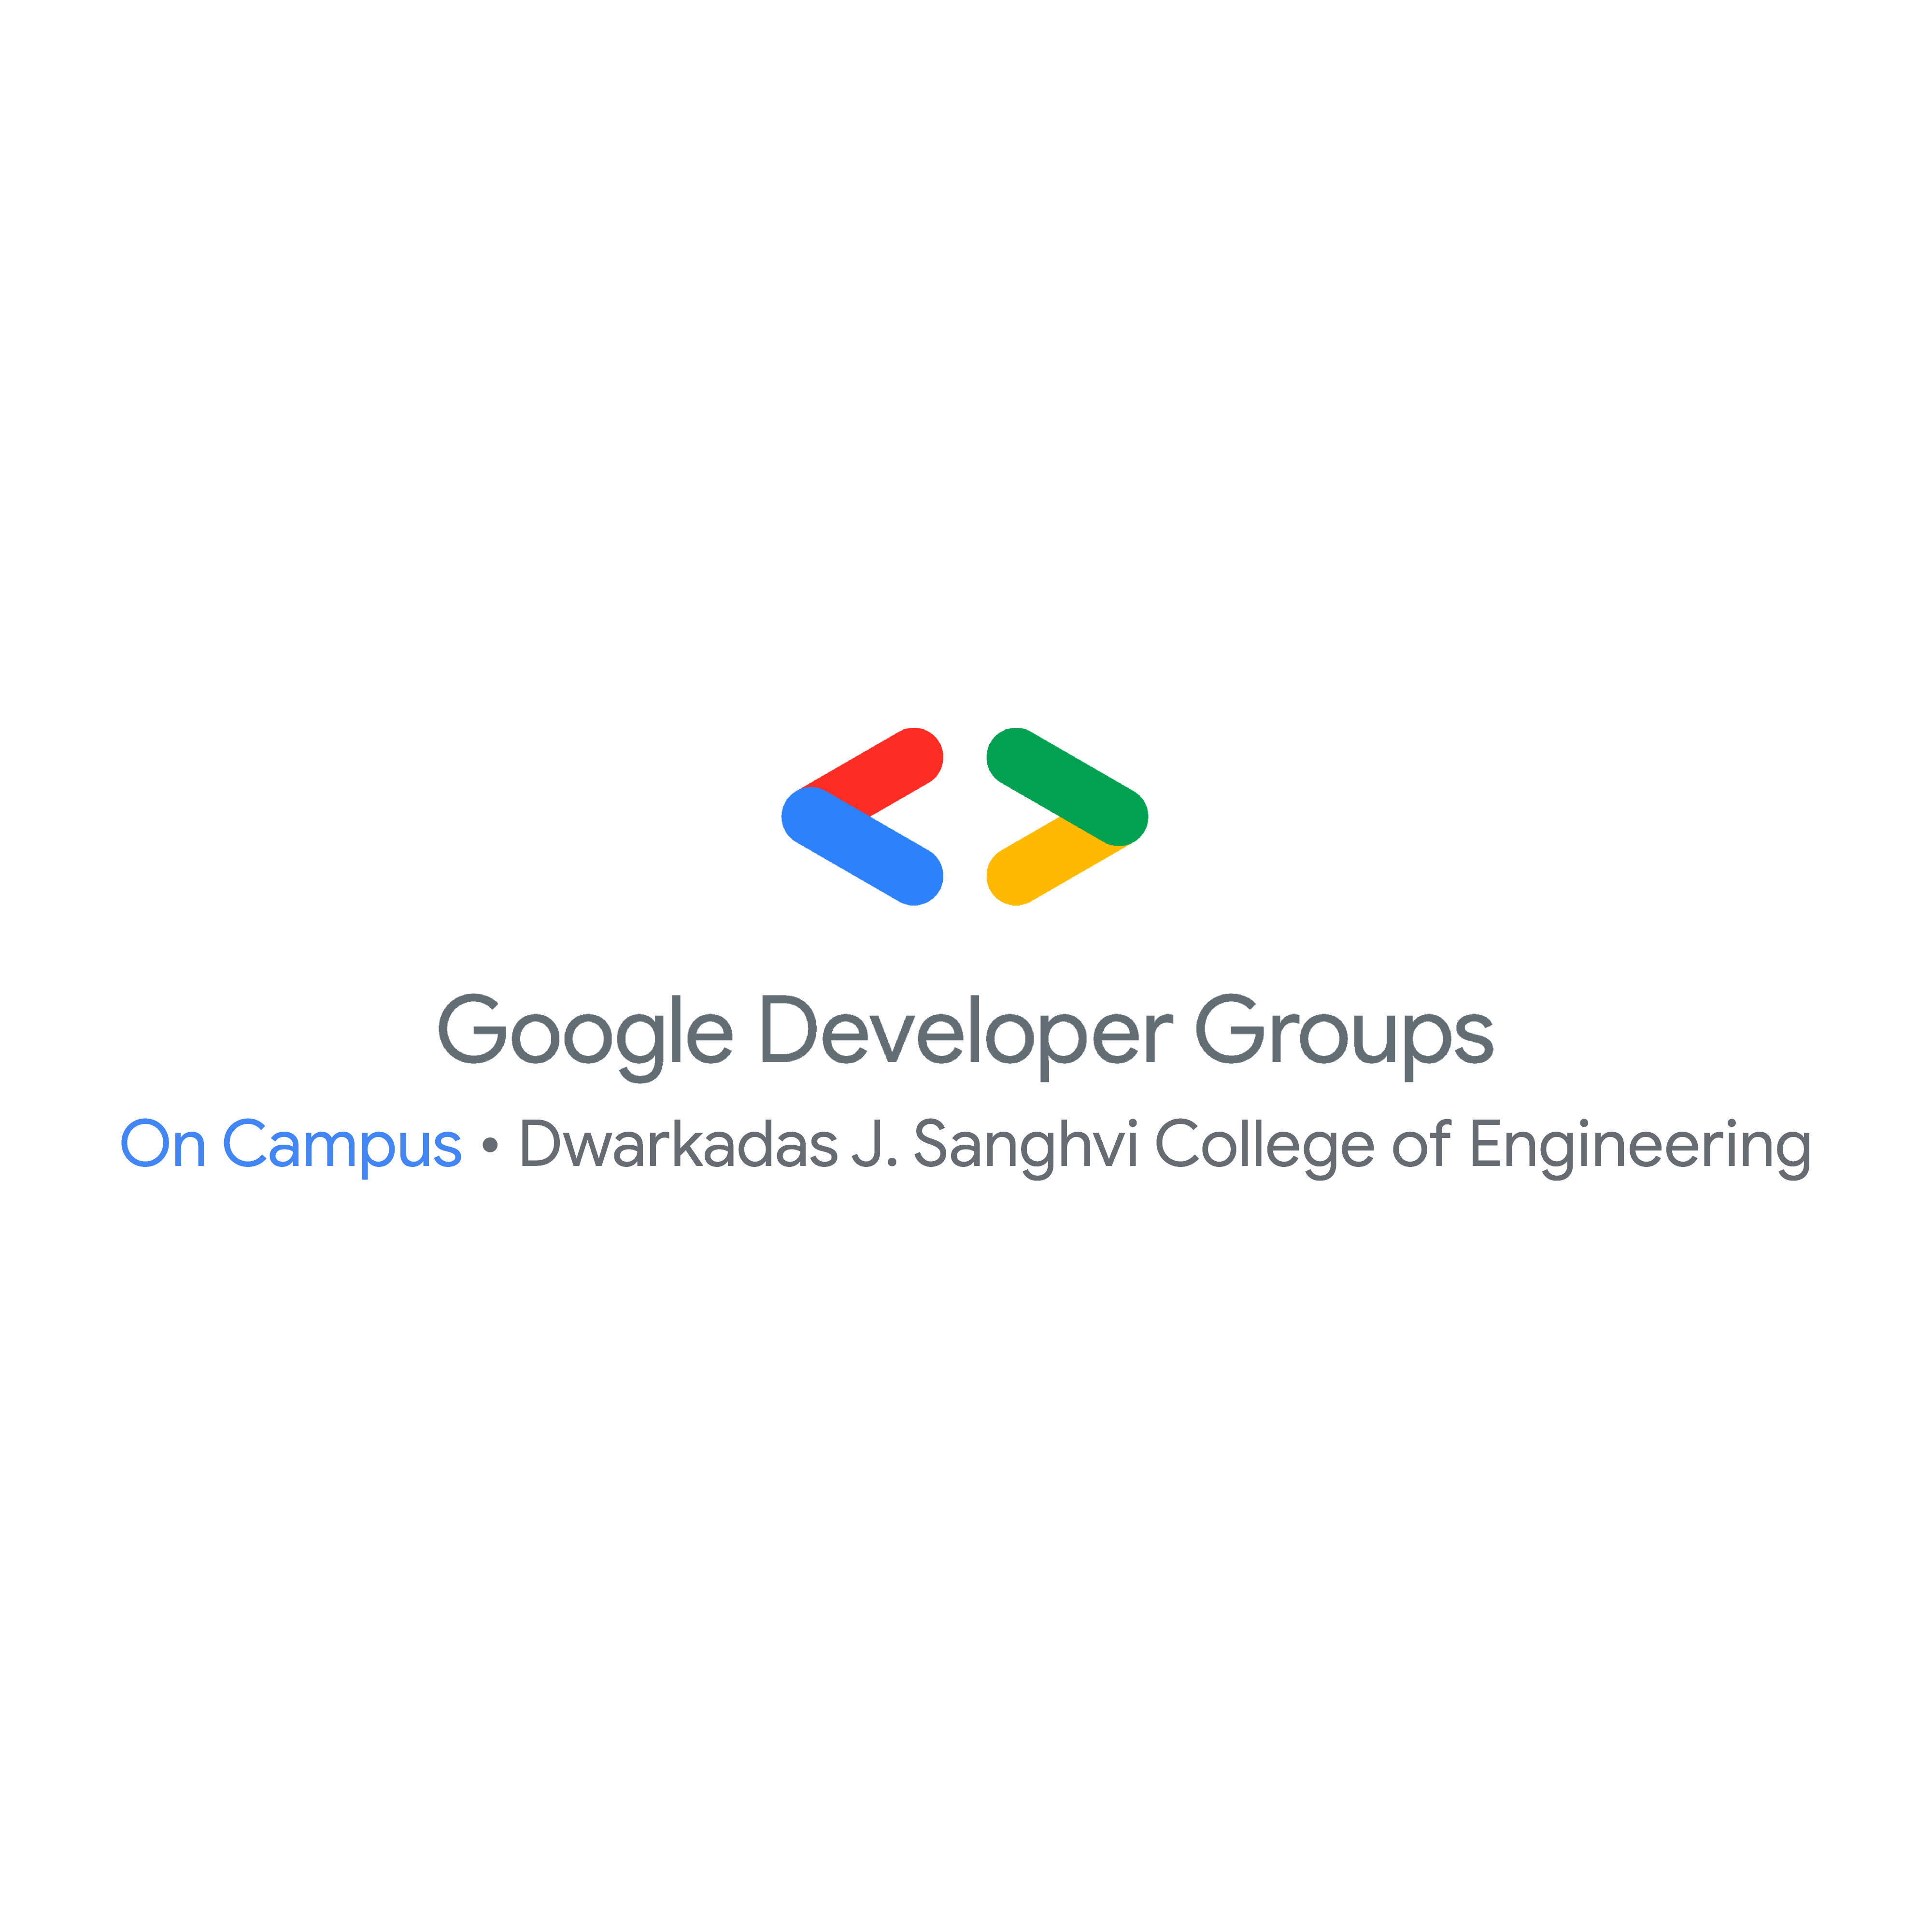

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [4]:
# try researching about regex
print(df["Name"])
df["Title"] = df["Name"].str.extract(r",\s*(\w+\.)")
df.head()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [5]:
#write code here
df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [6]:
#write code here
nan_percentage = df.isna().mean() * 100
print(nan_percentage)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.112233
dtype: float64


In [7]:
df.drop(["Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [8]:
#write code here
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df.head()

<ipython-input-8-65f7dcb46169>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
<ipython-input-8-65f7dcb46169>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [9]:
#write code here
df["Family_members"] = df["SibSp"] + df["Parch"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.0,1,0,7.2500,S,Mr.,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,1
2,1,3,female,26.0,0,0,7.9250,S,Miss.,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,1
4,0,3,male,35.0,0,0,8.0500,S,Mr.,0


In [10]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["Age", "Fare", "Family_members"]
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr.,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs.,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss.,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs.,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr.,0.0


In [11]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
df = pd.get_dummies(df, columns=['Pclass','Sex','Title','Embarked'])
df.head()

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,1,0.472229,1,0,0.139136,0.1,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,1,0.321438,0,0,0.015469,0.0,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,1,0.434531,1,0,0.103644,0.1,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0,0.434531,0,0,0.015713,0.0,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [12]:
#write code here
y = df["Survived"]


<b>remove the y_label (survived) from the dataframe</b>

In [13]:
#write code here
df.drop(["Survived"], axis=1, inplace=True)
df.head()

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
1,0.472229,1,0,0.139136,0.1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0.321438,0,0,0.015469,0.0,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.434531,1,0,0.103644,0.1,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,0.434531,0,0,0.015713,0.0,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [14]:
#write code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [15]:
#write code here
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

<b>Print the Model Accuracy</b>

In [16]:
#write code here
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7611940298507462


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:Decision Tree Classifier can be used for marketing.like which group should be targeted for marketing their product.predict whether the user has the chance to buy their product based on factors like age,location,previous purchases.And to predict this Decision Tree Classifer can be used

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

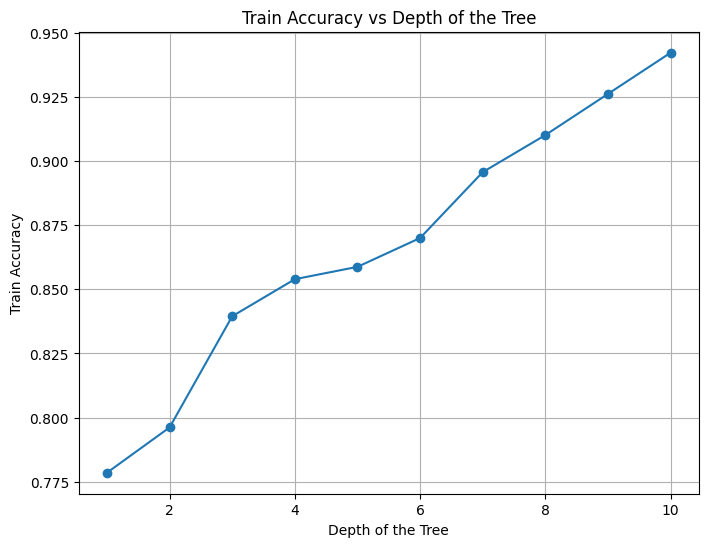

In [17]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracies = []
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), train_accuracies, marker = 'o')
plt.xlabel('Depth of the Tree')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs Depth of the Tree')
plt.grid(True)


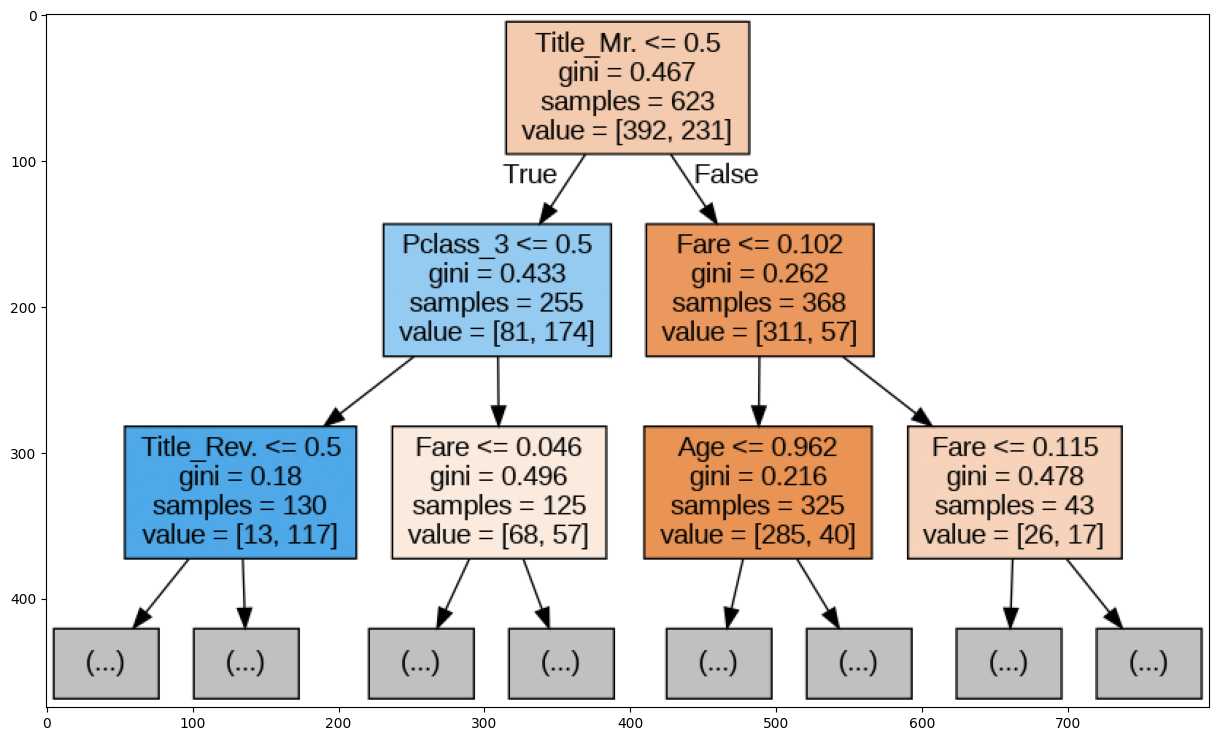

In [18]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [19]:
#write code here
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 94.22%
Test Accuracy: 79.10%


## Explain: What is your understanding of the charts you made above?

Ans:So in the above chart it shows how the decision tree algorithm works.first for the root node it takes the feature Title_Mr so if the condition is true it will go to the feature Pclass_3 and further depending on condition it move further.and if the condition for the feature Title_Mr is false it will go towards the feature Fare and further depending on the condition it will move further.now while classifying the Decision tree algorithm starts from the node and depending on the condition it moves till the leaf node and according to the leaf node it classifies for example in this case it classifies whether the person survived or not.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [20]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.667910447761194


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

**Decision Tree Classifier**

When to Use:
Use a decision tree when you want to understand how decisions are made step by step. For example, if you're deciding whether a passenger on the Titanic survived or not, it helps you see the exact rules the model is using,like what was the title of the passenger or what was the fare

Why to Use:
It is easy to explain and visualize.
It is used when relationships between the features might not be straightforward, like a mix of age, class, and fare deciding survival.

What Type of Data:
Works well for both numbers and categories (e.g., age, gender, or ticket type).
But it can overfit if the data is too detailed.

**Naive Bayes Algorithm**

When to Use:
Use Naive Bayes when you need something fast and simple. For example, sorting emails into "spam" or "not spam" works great with this because it is quick and works well with text data.

Why to Use:
It is incredibly fast, even for big datasets.
Works well even when things are messy or features arent perfect.

What Type of Data:
Best for text-based tasks, like spam filtering or sentiment analysis (is the review positive or negative?).
Best when the features (like words in an email) are mostly independent of each other.

Decision Tree Classifier is perfect when you want a clear, step-by-step explanation of decisions, making it ideal for tasks where relationships between features are complex and need to be visualized. On the other hand, Naive Bayes is best for fast and simple tasks, especially with text data, where features are mostly independent. Choose Decision Trees for interpretability and Naive Bayes for speed.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [21]:
#write code here
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42,n_jobs=-1)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8022388059701493


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:Random Forest and Decision Trees will have the same accuracy when the Random Forest uses only one tree (n_estimators=1) and no bootstrapping (each tree gets the same data). In this case, Random Forest behaves just like a single Decision Tree, making their predictions identical.In this case, Random Forest effectively becomes the same as a single Decision Tree, so the accuracy will be the same as using just one Decision Tree on its own.

## Extra - BaggingClassifier

In [22]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


bagging_model = BaggingClassifier(n_estimators=100, random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_bagging_model = grid_search.best_estimator_
y_pred = best_bagging_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best Parameters: {'bootstrap': True, 'max_samples': 0.5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8138315991576861
Test Accuracy: 0.80


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:
When to Use:

Random Forest: Use it when you want a reliable model that works well out of the box, especially for tasks like predicting something or classifying categories, even if your data is complex.

Bagging Classifier: Use it when you already have a good model (like a decision tree) and want to make it better by reducing its chances of overfitting.

Why to Use:

Random Forest: It's powerful because it not only builds multiple decision trees but also picks random features to make each tree unique, reducing errors and overfitting.

Bagging Classifier: It's flexible because it can improve the performance of any model by training them on different random parts of your data.

What Type of Data:

Random Forest: Great for large datasets with many features, especially when the relationships in the data are not straightforward.

Bagging Classifier: Works with any kind of data and model but shines when the base model performs well on small parts of the data but overfits the whole dataset.

basically Random Forest is like a specialized version of Bagging Classifier that only uses decision trees and adds an extra twist by using random features. Bagging Classifier is more general and works with any model you choose to use as the base.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [23]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")

cv_scores = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation Accuracy: 0.82


## Explain: What is the difference between Bagging and Boosting?

Ans:
When to Use:

Bagging: Use Bagging when your model is overfitting and needs more stability. It's ideal for reducing variance by training models on random subsets of the data.

Boosting: Use Boosting when your model isn't performing well enough and you want to improve its accuracy. It focuses on correcting errors made by previous models.

Why to Use:

Bagging: It builds multiple models in parallel and combines their results to make predictions more stable and less prone to overfitting.

Boosting: It builds models sequentially, each one learning from the mistakes of the previous one, making it very powerful for improving weak models.

What Type of Data:

Bagging: Works well when the data is noisy or the base model (like a decision tree) overfits easily. It’s good for reducing randomness in predictions.

Boosting: Works best with clean and well-structured data, where improving accuracy is the goal. It may struggle with noisy data as it tries to fit every detail.

basically bagging focuses on making models more stable by training them independently on random subsets of data. Boosting focuses on making models smarter by fixing their errors one step at a time. Both are ensemble methods, but they take different paths to improve predictions.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [27]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

accuracy_scorer = make_scorer(accuracy_score)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = ParameterGrid(param_grid)

best_model = None
best_score = 0
total_score = 0
num_models = 0

for params in grid:
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    total_score += score
    num_models += 1
    print(f"Parameters: {params} => Test Accuracy: {score:.2f}")

    if score > best_score:
        best_score = score
        best_model = model
average_accuracy = total_score / num_models
print("Best Parameters Found:", best_model.get_params())
print(f"Best Test Accuracy: {best_score:.2f}")
print(f"Average Accuracy Across All Models: {average_accuracy:.2f}")

Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5} => Test Accuracy: 0.83
Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10} => Test Accuracy: 0.83
Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} => Test Accuracy: 0.82
Paramet

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:
After analysing these techniques,based on the accuracy,**Boosting** technique is most optimal for the model.

Bagging-0.80

Boosting-0.82

Pruning-0.81

# **Compulsory Task**

Research and create a short blog on the topic of **XG Boost and AdaBoost Classifier and Regressor**.

# **XG Boost**

XGBoost (Extreme Gradient Boosting) is reliable for both Regression and Classification . It is built on the concept of Gradient Boosting, XGBoost combines the outputs of several weak learners to create a strong predictive model. It is highly efficient, offering speed, accuracy, and flexibility.

**Why to Use**

*   Efficiency: It is optimized for speed and can handle large datasets efficiently, making it suitable for real-world applications where time is crucial.
*   Accuracy: The algorithm employs advanced techniques like regularization (L1 and L2) to avoid overfitting, ensuring better generalization to new data.

*   Flexibility: It supports a variety of objectives, from regression to classification and ranking, and allows for fine-tuning of parameters to suit specific needs.
*   Robustness: XGBoost can automatically handle missing values and create optimal splits, saving time in data preprocessing.
*   Scalability: With support for parallel processing and distributed computing, XGBoost is ideal for big data scenarios.


**When to Use**


*   High-Accuracy Needs: When the problem requires highly accurate predictions, such as medical diagnosis, fraud detection, or critical business decisions.

*   Large and Complex Datasets: It works efficiently with large,
 high-dimensional datasets where traditional algorithms might struggle.

*   Structured Data: XGBoost works well with tabular data with both categorical and numerical features.

*   Dealing with Missing Data: Use XGBoost when you want a model that handles missing values without requiring extensive imputation strategies.


**What Type of Data**
XGBoost is optimized for structured, tabular data.


*   Classification Tasks
*   Regression Tasks
*   Ranking Tasks
*   Data with Missing Values
*   High-Dimensional Data


In simple words, XGBoost is known for its accuracy and speed. It is used for handling big data, finding complex patterns, and dealing with missing values.  Its ability to give high performance with less risk of overfitting makes it a top pick for any task where you need reliable results. It is easy to use, but with the right tuning, it can make your model even better.



# **AdaBoost**

AdaBoost (Adaptive Boosting) is an ensemble learning technique that combines multiple "weak" learners, typically decision trees, to create a strong predictive model. It works by giving more weight to data points that are misclassified by previous models, allowing the next model in the sequence to focus more on those difficult examples. AdaBoost is well-known for its simplicity, effectiveness, and ability to boost the performance of simple models.

**Why to Use**


*   Simplicity: AdaBoost is straightforward to implement and understand, making it a good choice for those who need a powerful yet easy-to-use model.

*   Adaptivity: It adapts to the mistakes made by previous models by focusing on the harder-to-predict data points, improving overall model performance.

*   Flexibility: AdaBoost can work with different types of base estimators, though decision trees are most commonly used.

*   Robustness to Overfitting: While it can overfit if the base model is too complex, AdaBoost generally performs well with simpler models and fewer features.

*   Versatility: It can be used for both classification and regression tasks, making it a valuable tool for a variety of applications.


**When to Use**


*   When You Want to Improve Model Performance: If a base model is underperforming and you need a way to boost its accuracy, AdaBoost can improve results without needing a complete overhaul.

*   Simple and Quick Solutions: When you need a reliable model that doesn’t require complex tuning and can be set up quickly.

*   When Dealing with Imbalanced Data: AdaBoost can help when certain classes are harder to predict by focusing on the misclassified examples.

*   Applications Requiring High Accuracy: If you need precise results for applications such as customer segmentation, credit scoring, or certain predictive maintenance tasks.


What Type of Data

AdaBoost works best with tabular data that has clear features.

*   Classification Tasks
*   Regression Tasks
*   Data with Outliers
*   Low to Medium Dimensional Data


In simple terms, AdaBoost is a powerful and easy-to-use algorithm that can significantly improve the performance of simpler models. It is effective when you want to focus on difficult to predict data points and boost the overall accuracy of your model. While it can be sensitive to noisy data and may overfit with overly complex base models, it is still  optimal for many tasks involving structured data. Its adaptivity and versatility make it a great tool for both classification and regression problems where you need a quick solution that yields high accuracy.







# **End of Task**

